解压收到的压缩包文件到指定的目录

In [1]:
# 解压一个文件夹里的所有文件至一个指定目录
import os
import shutil

# 压缩文件所在目录
src_dir = r'D:\Code\Python\PaChong\Crawlpreprocess\Tempzip'
# 解压文件存放目录
dst_dir = r'D:\Code\Python\PaChong\Crawlpreprocess\sqlite'

# 遍历src_dir目录下所有文件
for file in os.listdir(src_dir):
    # 判断是否为文件
    if os.path.isfile(os.path.join(src_dir, file)):
        # 解压文件至dst_dir目录
        shutil.unpack_archive(os.path.join(src_dir, file), dst_dir)

##############批量转换文件夹里的sqlite为csv

In [1]:
import sqlite3
import pandas as pd
import os

# 定义文件夹路径
folder_path = 'sqlite'  # 你需要替换成实际的文件夹路径

# 列出文件夹中的所有文件
files = os.listdir(folder_path)
print(files)

# 筛选出sqlite文件
sqlite_files = [os.path.join(folder_path, file) for file in files if file.endswith('.sqlite')]
print(sqlite_files)

# 连接到SQLite数据库
for i in range(len(sqlite_files)):
    # 连接到数据库
    conn = sqlite3.connect(sqlite_files[i])

    # 获取数据库中所有表格的表名
    tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

    # 遍历每个表格，并将其导出为CSV文件
    for table in tables['name']:
        df = pd.read_sql_query("SELECT * from " + table, conn)
        name=sqlite_files[i][:-7]
        # print(name+table+'.csv')
        # print(name)
        if table=='weibo':
            # print(name+table+'.csv')
            df.to_csv(name+table+'.csv', index=False,encoding='utf-8-sig')

    # 关闭数据库连接
    conn.close()

['% Arabica(武康路店).sqlite', '%Arabica(TWO ITC店).sqlite', '%Arabica(上海烘焙工坊店).sqlite', '%Arabica(前滩太古里店).sqlite', '%Arabica(外滩源新店).sqlite', '%Arabica(新天地广场店).sqlite', '(新品)汉庭酒店(上海人民广场大沽路店).sqlite', '(清真)德元兰州纯汤牛肉面.sqlite', '(齐舞空间)SEVENTFIVE.sqlite', '00豫园新春民俗艺术灯会.sqlite', '04影棚.sqlite', '0分串吧·小酒馆(三金大厦写字楼店).sqlite', '1 Garden.sqlite', '100FFEE CAFE百啡待兴.sqlite', '118广场.sqlite', '118空间创意园区.sqlite', '1192弄上海风情街.sqlite', '119弄老上海风情街.sqlite', '11号线上海西站.sqlite', '11号线秀沿路站.sqlite', '128科创园.sqlite', '1500名车俱乐部.sqlite', '158&公路商店.sqlite', '1788国际中心.sqlite', '1862老船厂•时尚艺术中心.sqlite', '186老船厂•时尚艺术中心.sqlite', '1876老站创意园.sqlite', '1886德国汽车餐厅(环宇荟店).sqlite', '1886汽车主题德国餐厅(新天地店).sqlite', '1886汽车主题德国餐厅外滩啤酒总汇店.sqlite', '1933.sqlite', '1933展览馆.sqlite', '1933老场坊.sqlite', '1933购物中心.sqlite', '1984bookstore.sqlite', '1Q33 PARTY K(长安路店).sqlite', '1点点(裕德店).sqlite', '233 BAR.sqlite', '23度不太冷椰子鸡火锅(日月光店).sqlite', '24ans.sqlite', '259商家菜.sqlite', '288酒吧餐厅.sqlite', '313羊庄(临汾路店).sqlite', '353广场.sqlite', '3637SpaceCoffee(华

2、将所有的csv合并到一个csv中

In [ ]:
import pandas as pd
import os

# 定义文件夹路径
folder_path = 'sqlite'  # 你需要替换成实际的文件夹路径

# 初始化一个空的DataFrame来存储合并后的数据
combined_csv = pd.DataFrame()

# 遍历文件夹中的所有文件
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        # 读取CSV文件
        df = pd.read_csv(file_path)
        # 将读取的DataFrame合并到combined_csv中
        combined_csv = pd.concat([combined_csv, df], ignore_index=True)

# 将合并后的数据保存到一个新的CSV文件
combined_csv.to_csv('combined.csv', index=False, encoding='utf-8-sig')

# 20241128 用时60min 8.5s


C:\Users\name\AppData\Local\Temp\ipykernel_19600\1562570224.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_csv = pd.concat([combined_csv, df], ignore_index=True)
C:\Users\name\AppData\Local\Temp\ipykernel_19600\1562570224.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_csv = pd.concat([combined_csv, df], ignore_index=True)
C:\Users\name\AppData\Local\Temp\ipykernel_19600\1562570224.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA ent

In [3]:
# 5、删除sqlite文件夹的所有csv文件
import os
import shutil

path = "sqlite"
for file in os.listdir(path):
    if file.endswith(".csv"):
        os.remove(os.path.join(path, file))


1、通过name匹配sqlite文件名搜寻坐标并导入

In [2]:
import sqlite3
import pandas as pd
import os
import transformer

# 读取数据1文件
# data1_path = 'poinameaddress.csv'  # 你需要替换成实际的数据1文件路径
data1_path = 'location_gd_with_updates.csv'
data1_df = pd.read_csv(data1_path)

# 定义文件夹路径
folder_path = 'sqlite'  # 你需要替换成实际的文件夹路径

# 列出文件夹中的所有文件
files = os.listdir(folder_path)
print(files)

# 筛选出sqlite文件
sqlite_files = [os.path.join(folder_path, file) for file in files if file.endswith('.sqlite')]
print(sqlite_files)

# 初始化成功匹配的计数器
success_count = 0
# 初始化未匹配的列表
unmatched = []

# 连接到SQLite数据库
for sqlite_file in sqlite_files:
    # 获取文件名（不包括扩展名）
    file_name = os.path.basename(sqlite_file).replace('.sqlite', '')

    # 查找数据1文件里的name列
    match = data1_df[data1_df['name'] == file_name]
    if not match.empty:
        success_count += 1
        gcj02_lng = match['gcj02_lng'].values[0]
        gcj02_lat = match['gcj02_lat'].values[0]
        wgs84_lng = match['wgs84_lng'].values[0]
        wgs84_lat = match['wgs84_lat'].values[0]

        # 连接到数据库
        conn = sqlite3.connect(sqlite_file)

        # 获取数据库中所有表格的表名
        tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

        # 遍历每个表格，并将其导出为CSV文件
        for table in tables['name']:
            df = pd.read_sql_query("SELECT * from " + table, conn)
            if table == 'weibo':
                df['gcj02_lng'] = gcj02_lng
                df['gcj02_lat'] = gcj02_lat
                df['wgs84_lng'] = wgs84_lng
                df['wgs84_lat'] = wgs84_lat
                
                df.to_csv(os.path.join(folder_path, file_name + table + '.csv').replace('weibo',''), index=False, encoding='utf-8-sig')

        # 关闭数据库连接
        conn.close()
    else:
        # unmatched.append({'name': file_name, 'file_name': sqlite_file})
        unmatched.append({'name': file_name, 'file_name': sqlite_file})

# 输出成功匹配的计数器
print('成功匹配的计数器:', success_count)

# 将未匹配的name和file_name输出到一个CSV文件中
unmatched_df = pd.DataFrame(unmatched)
unmatched_df.to_csv('unmatched.csv', index=False, encoding='utf-8-sig')


['% Arabica(武康路店).sqlite', '%Arabica(TWO ITC店).sqlite', '%Arabica(上海烘焙工坊店).sqlite', '%Arabica(前滩太古里店).sqlite', '%Arabica(外滩源新店).sqlite', '%Arabica(新天地广场店).sqlite', '(新品)汉庭酒店(上海人民广场大沽路店).sqlite', '(清真)德元兰州纯汤牛肉面.sqlite', '(齐舞空间)SEVENTFIVE.sqlite', '00豫园新春民俗艺术灯会.sqlite', '04影棚.sqlite', '0分串吧·小酒馆(三金大厦写字楼店).sqlite', '1 Garden.sqlite', '100FFEE CAFE百啡待兴.sqlite', '118广场.sqlite', '118空间创意园区.sqlite', '1192弄上海风情街.sqlite', '119弄老上海风情街.sqlite', '11号线上海西站.sqlite', '11号线秀沿路站.sqlite', '128科创园.sqlite', '1500名车俱乐部.sqlite', '158&公路商店.sqlite', '1788国际中心.sqlite', '1862老船厂•时尚艺术中心.sqlite', '186老船厂•时尚艺术中心.sqlite', '1876老站创意园.sqlite', '1886德国汽车餐厅(环宇荟店).sqlite', '1886汽车主题德国餐厅(新天地店).sqlite', '1886汽车主题德国餐厅外滩啤酒总汇店.sqlite', '1933.sqlite', '1933展览馆.sqlite', '1933老场坊.sqlite', '1933购物中心.sqlite', '1984bookstore.sqlite', '1Q33 PARTY K(长安路店).sqlite', '1点点(裕德店).sqlite', '233 BAR.sqlite', '23度不太冷椰子鸡火锅(日月光店).sqlite', '24ans.sqlite', '259商家菜.sqlite', '288酒吧餐厅.sqlite', '313羊庄(临汾路店).sqlite', '353广场.sqlite', '3637SpaceCoffee(华

3、完成时间的转换

In [1]:
import pandas as pd
from datetime import datetime

df=pd.read_csv('combined.csv')
print(len(df))
# 定义一个函数来转换日期格式并返回星期几
def convert_date_and_weekday(date_str):
    # 将日期字符串转换为datetime对象
    dt = datetime.strptime(date_str, '%a %b %d %H:%M:%S %z %Y')
    # 将datetime对象格式化为目标格式
    formatted_date = dt.strftime('%Y-%m-%d %H:%M:%S')
    # 获取星期几的英文缩写
    weekday = dt.strftime('%a')
    return formatted_date, weekday

# 应用转换函数到created_time列，并创建新的weekday列
df[['time_converted', 'weekday']] = df['created_time'].apply(lambda x: pd.Series(convert_date_and_weekday(x)))

# 按照time_converted列 的时间顺序排序
df = df.sort_values(by='time_converted')

# 去除掉wgs_lng和wgs_lat和gcj02_lng和gcj02_lat这四列中为空的行
df = df.dropna(subset=['wgs84_lng', 'wgs84_lat', 'gcj02_lng', 'gcj02_lat'])

# 保存处理后的文件
df.to_csv('combined_processed.csv', index=False,encoding='utf-8-sig')
print(len(df))
# os.remove('combined.csv')

1195624
1193978


4、按照时间进行月份的切割

In [4]:
import pandas as pd

# 读取数据
path = '按月份切割'
data = pd.read_csv('combined_processed.csv')

# 将time_converted列转换为日期时间格式
data['time_converted'] = pd.to_datetime(data['time_converted'])

# 按照月份进行分组
data['month'] = data['time_converted'].dt.to_period('M')

# 遍历每个月份的数据并保存为CSV文件
for month, group in data.groupby('month'):
    start_date = month.strftime('%Y%m01')
    end_date = (month + 1).strftime('%Y%m01')
    count = len(group)  # 获取该月数据的条数
    filename = f'{start_date}_{end_date} {count} 条.csv'
    
    # 去除month列
    group = group.drop(columns=['month'])
    
    group.to_csv(f'{path}/{filename}', index=False, encoding='utf-8-sig')


数据的文本清洗

In [1]:
import pandas as pd
import re
import jieba

def clean_content(content):
    if not isinstance(content, str):
        return ""
    
    # 去除含有 上海· 以及后面的所有字符 !!!!!
    content = re.sub(r"上海·.*", "", content)
    # 去除一些关键词
    content = (
        content.replace("分享图片", "")
        .replace("分享视频", "")
        .replace("微博视频", "")
        .replace("的微博视频", "")
        .replace("网页链接", "")
        .replace("超话", "")
        .replace("新浪图片", "")
        .replace("<br>", "")
    )
    # 去除英文
    content = re.sub(r"[a-zA-Z]+", "", content)
    content = (
        re.sub(r"\d+", "", content).replace(" ", "").replace(".", "").replace("_", "")
    )
    # 去除所有非中文符号
    content = re.sub(r"[^\u4e00-\u9fa5]", "", content)
    # 去除空白字符
    content = re.sub(r"\s+", "", content)
    return content

dat=pd.read_csv(r"按月份切割/20240501_20240601 36768 条.csv")
# print(dat)

dat['clean_content']=dat.apply(lambda row:clean_content(row['content']),axis=1)
print("清洗完成 " + str(len(dat)))

dat = dat[dat["clean_content"] != ""]
print("去除空白行完成 " + str(len(dat)))

dat = dat[
    (dat["clean_content"].apply(lambda x: len(x) < 512))
    & (dat["clean_content"].apply(lambda x: len(x) > 3))
]
print("保留字数大于3完成 " + str(len(dat)))

dat["jieba_cut"] = dat["clean_content"].apply(lambda x: jieba.lcut(x))
print("分词完成 " + str(len(dat)))


dat.to_csv(r"20240501_20240601 36768 条_clean.csv",index=False,encoding='utf-8-sig')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\name\AppData\Local\Temp\jieba.cache


清洗完成 36768
去除空白行完成 33084
保留字数大于3完成 30527


Loading model cost 0.594 seconds.
Prefix dict has been built successfully.


分词完成 30527


分开画图 ############################################## 这里是分割线

['1933老场坊.sqlite', '1933老场坊weibo.csv', '70后饭吧常德店.sqlite', '70后饭吧常德店weibo.csv', '96广场.sqlite', '96广场weibo.csv', 'Apple Store 苹果官方零售店(南京东路店).sqlite', 'Apple Store 苹果官方零售店(南京东路店)weibo.csv', 'Maancoffee.sqlite', 'Maancoffeeweibo.csv', 'Mo-Mo牧场 Mo-Mo-Paradise.sqlite', 'Mo-Mo牧场 Mo-Mo-Paradiseweibo.csv', '七宝古镇.sqlite', '七宝古镇weibo.csv', '七宝老街.sqlite', '七宝老街weibo.csv', '万达商业广场.sqlite', '万达商业广场weibo.csv', '万达国际电影城(五角场店).sqlite', '万达国际电影城(五角场店)weibo.csv', '万达广场(上海宝山店).sqlite', '万达广场(上海宝山店)weibo.csv', '万达广场写字楼A座(国宾路).sqlite', '万达广场写字楼A座(国宾路)weibo.csv', '万达影城(五角场万达广场店).sqlite', '万达影城(五角场万达广场店)weibo.csv', '三宝粥铺金陵东路店.sqlite', '三宝粥铺金陵东路店weibo.csv', '上海K11购物艺术中心.sqlite', '上海K11购物艺术中心weibo.csv', '上海万体馆.sqlite', '上海万体馆weibo.csv', '上海世博展览馆 Shanghai World EXPO Exhibition & Convention Center.sqlite', '上海世博展览馆 Shanghai World EXPO Exhibition & Convention Centerweibo.csv', '上海世茂广场.sqlite', '上海世茂广场weibo.csv', '上海世茂皇家艾美酒店.sqlite', '上海世茂皇家艾美酒店weibo.csv', '上海世贸商城.sqlite', '上海世贸商城weibo.csv', '上海东方明珠塔.sqlite', '上海东方

d:\ProgramData\MachineLearning\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


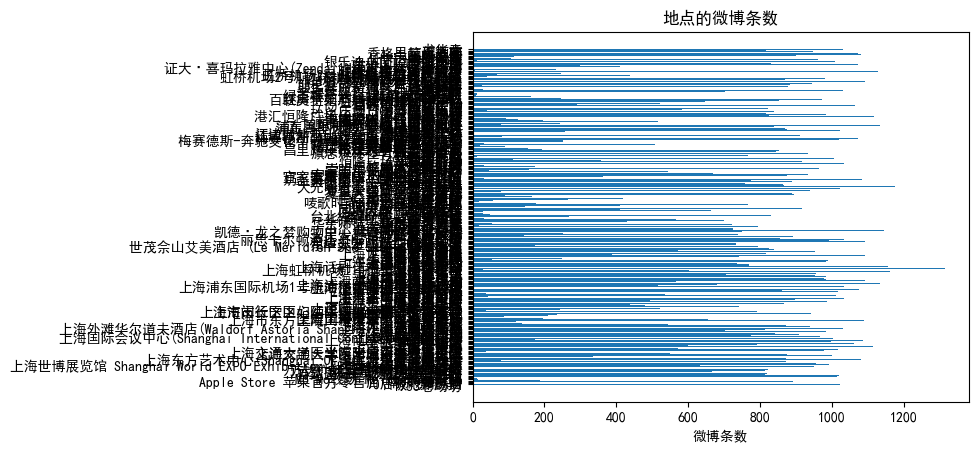

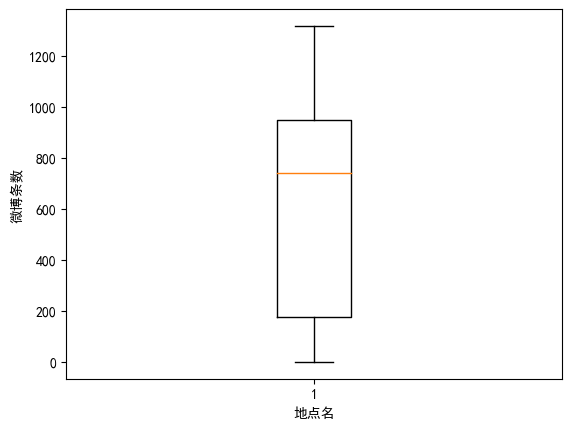

In [2]:
# 读取该文件夹的所有csv文件 统计其中的行数 画出对应的直方图
import os
import pandas as pd
import matplotlib.pyplot as plt

# 定义文件夹路径
folder_path = 'sqlite'  # 你需要替换成实际的文件夹路径

# 列出文件夹中的所有文件
files = os.listdir(folder_path)
print(files)

# 筛选出csv文件
csv_files = [os.path.join(folder_path, file) for file in files if file.endswith('.csv')]
print(csv_files)


# 统计csv文件中的行数
row_counts = []
for file in csv_files:
    df = pd.read_csv(file)
    row_counts.append(len(df))

# 画出直方图
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# 横轴和纵轴对换
plt.barh(range(len(row_counts)), row_counts)
# 名字去除末尾的.csv
# plt.yticks(range(len(row_counts)), [os.path.basename(file)[:-4] for file in csv_files])
# 名字再去掉weibo
plt.yticks(range(len(row_counts)), [os.path.basename(file)[:-9] for file in csv_files])
plt.xlabel('微博条数')
plt.title('地点的微博条数')
plt.show()

plt.boxplot(row_counts)
plt.xlabel('地点名')
plt.ylabel('微博条数')
plt.show()

一张图中多张子图（合并画图）

['1933老场坊.sqlite', '1933老场坊weibo.csv', '96广场.sqlite', '96广场weibo.csv', '万达商业广场.sqlite', '万达商业广场weibo.csv', '万达国际电影城(五角场店).sqlite', '万达国际电影城(五角场店)weibo.csv', '万达广场(上海宝山店).sqlite', '万达广场(上海宝山店)weibo.csv', '上海K11购物艺术中心.sqlite', '上海K11购物艺术中心weibo.csv', '上海世博展览馆 Shanghai World EXPO Exhibition & Convention Center.sqlite', '上海世博展览馆 Shanghai World EXPO Exhibition & Convention Centerweibo.csv', '上海东方明珠塔.sqlite', '上海东方明珠塔weibo.csv', '上海东方艺术中心(Shanghai Oriental Art Center).sqlite', '上海东方艺术中心(Shanghai Oriental Art Center)weibo.csv', '上海交通大学(闵行校区).sqlite', '上海交通大学(闵行校区)weibo.csv', '上海交通大学.sqlite', '上海交通大学weibo.csv', '上海交通大学医学院附属第九人民医院.sqlite', '上海交通大学医学院附属第九人民医院weibo.csv', '上海交通大学徐汇校区.sqlite', '上海交通大学徐汇校区weibo.csv', '上海体育馆.sqlite', '上海体育馆weibo.csv', '上海动物园.sqlite', '上海动物园weibo.csv', '上海南站.sqlite', '上海南站weibo.csv', '上海博物馆.sqlite', '上海博物馆weibo.csv', '上海国金中心IFC.sqlite', '上海国金中心IFCweibo.csv', '上海国际会议中心(Shanghai International Conference Center).sqlite', '上海国际会议中心(Shanghai International Conference Center

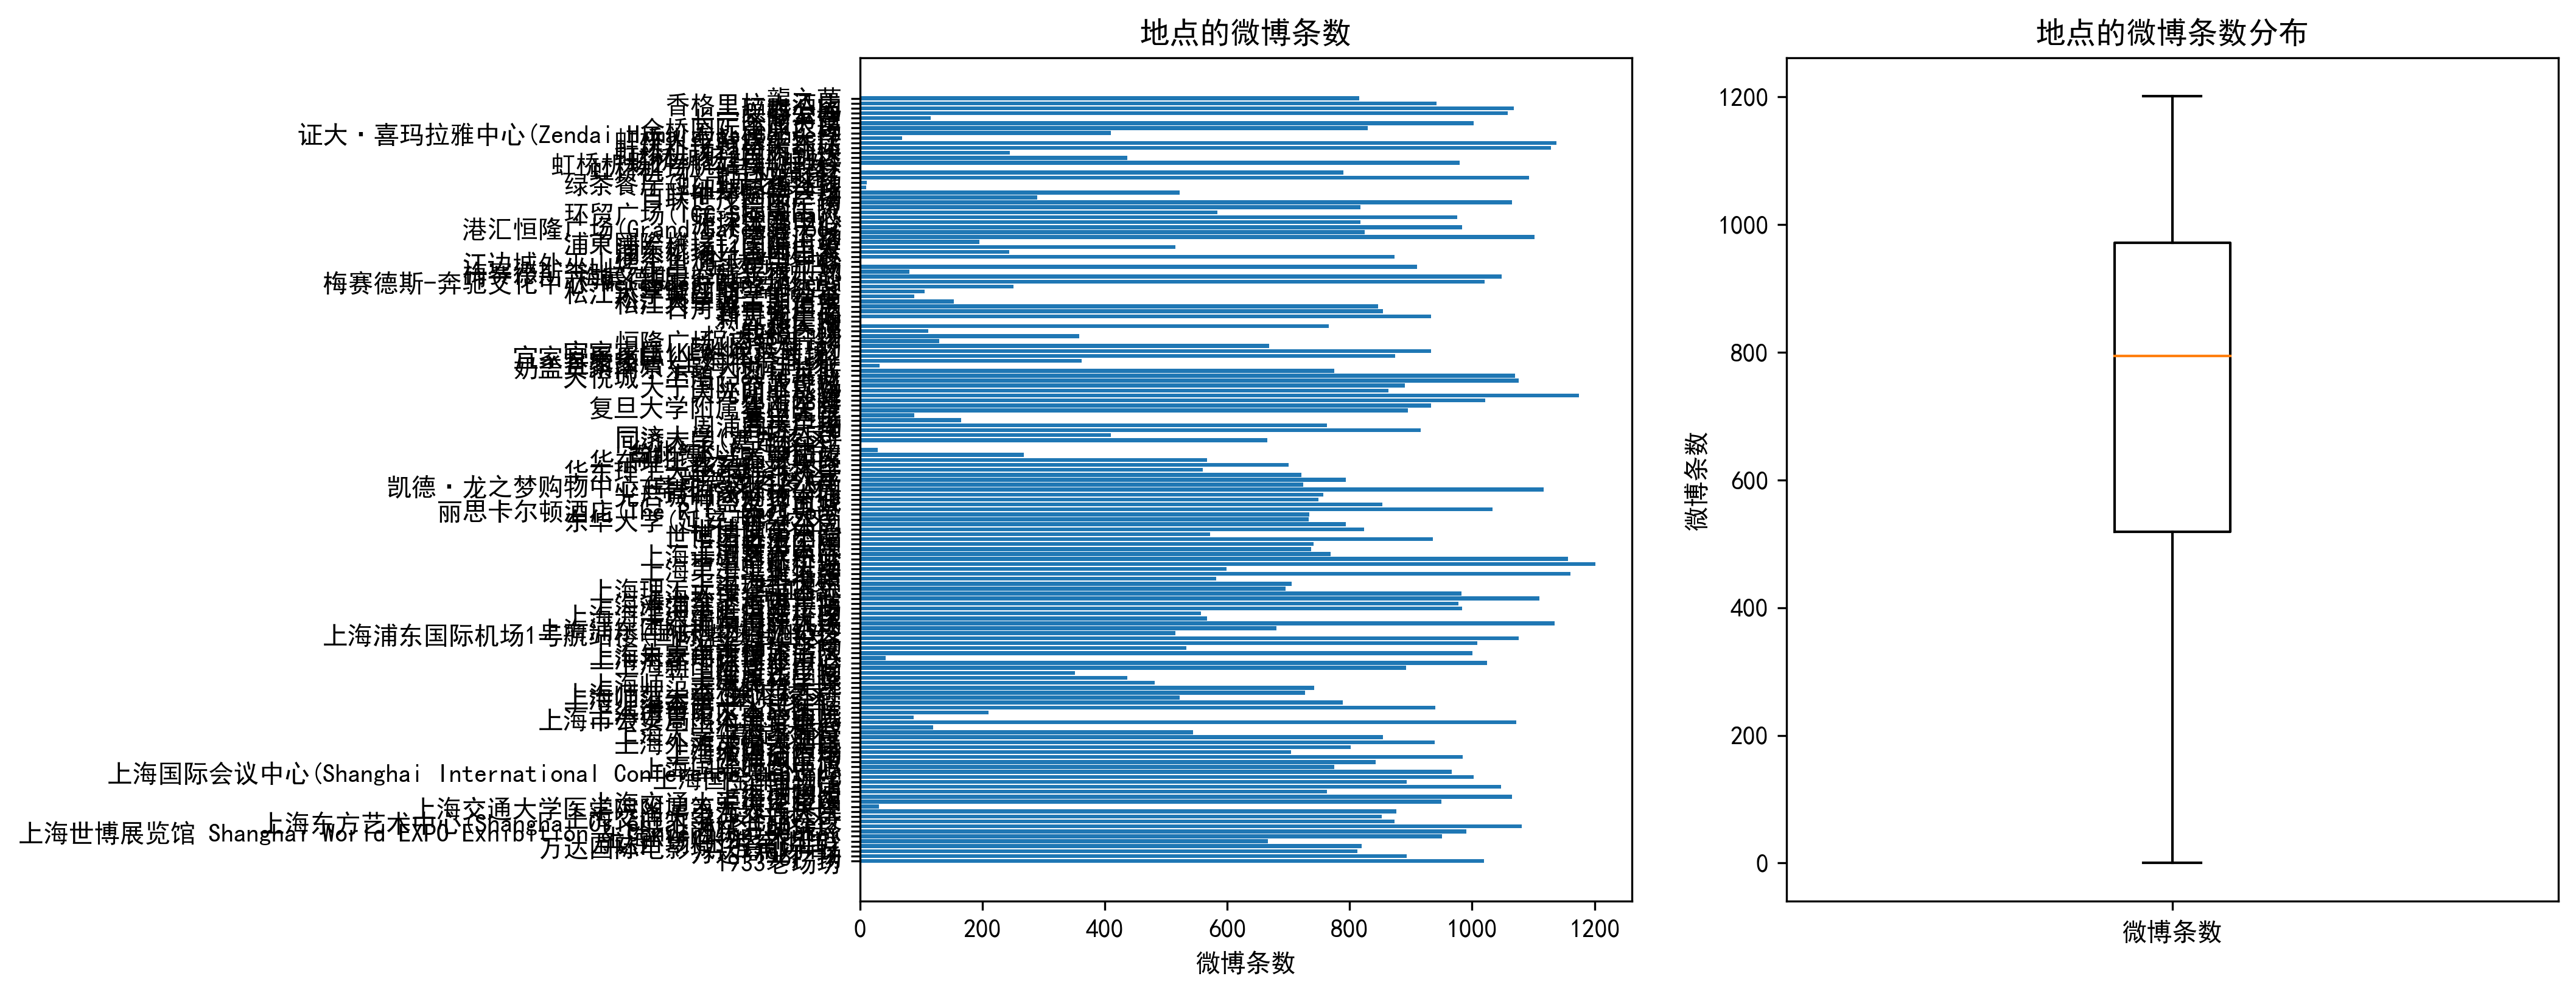

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 定义文件夹路径
folder_path = 'sqlite'  # 你需要替换成实际的文件夹路径

# 列出文件夹中的所有文件
files = os.listdir(folder_path)
print(files)

# 筛选出csv文件
csv_files = [os.path.join(folder_path, file) for file in files if file.endswith('.csv')]
print(csv_files)


# 统计csv文件中的行数
row_counts = []
for file in csv_files:
    df = pd.read_csv(file)
    row_counts.append(len(df))

# 画出直方图和箱线图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),dpi=300)  # 创建一行两列的图表
# 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']  
# 绘制直方图
ax1.barh(range(len(row_counts)), row_counts)
ax1.set_yticks(range(len(row_counts)))
ax1.set_yticklabels([os.path.basename(file)[:-9] for file in csv_files])
ax1.set_xlabel('微博条数')
ax1.set_title('地点的微博条数')

# 绘制箱线图
ax2.boxplot(row_counts)
ax2.set_xticklabels(['微博条数'])
ax2.set_ylabel('微博条数')
ax2.set_title('地点的微博条数分布')

plt.show()


In [9]:
import pandas as pd

# df=pd.read_csv('data/师大奉贤+同济部分.csv')
df=pd.read_csv('sqlite/虹桥机场2号航站楼(出发).csv')


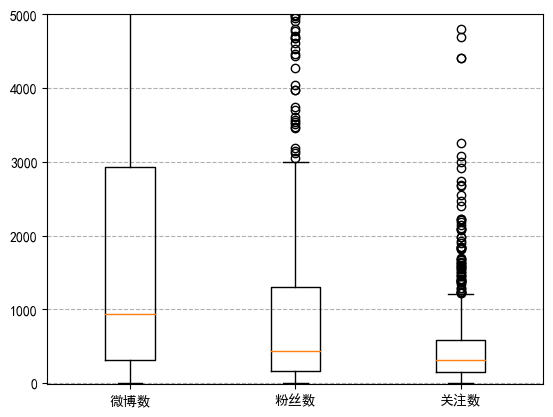

     statuses_count  followers_count  follow_count
0             42565          1675000          2149
1               525              110           189
2              1340               13            29
3              1505            96000            57
4               364               88            84
..              ...              ...           ...
974             119               32           114
975             227              325            78
976              85               25           101
977           12011              933           182
978             303               57           287

[979 rows x 3 columns]


In [10]:
# 对微博数据的statuses_count	followers_count	follow_count三列画箱线图
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签

def convert_number_format(number):
    if "万" in str(number):
        number=number.replace("万","0000")
        number=float(number)*10000
    
    try:
        return int(number)
    except:
        return float(number)


# 应用转换函数到指定列
df['statuses_count'] = df['statuses_count'].apply(lambda x: convert_number_format(x))
df['followers_count'] = df['followers_count'].apply(lambda x: convert_number_format(x))
df['follow_count'] = df['follow_count'].apply(lambda x: convert_number_format(x))

# 画箱线图
plt.boxplot([df['statuses_count'], df['followers_count'], df['follow_count']])
plt.xticks([1, 2, 3], ['微博数', '粉丝数', '关注数'])
plt.ylim(-10,5000)
plt.grid(True, axis='y',linestyle='--')  # 显示网格
plt.show()

tmp=df[['statuses_count','followers_count','follow_count']]
print(tmp)


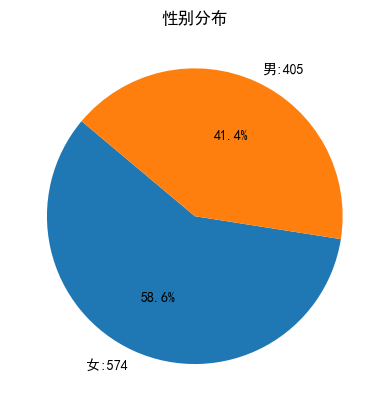

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# 得到数据中的女性数量
f_count=(df['user_gender']=='f').sum()
m_count=(df['user_gender']=='m').sum()
# 绘制饼图
labels = ['女:'+str(f_count),'男:'+str(m_count)]
sizes = [f_count, m_count]  # 替换这里的数据为您的实际数据，比如[f_count, m_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
# 设置图表标题
plt.title('性别分布')
# 显示饼图
plt.show()


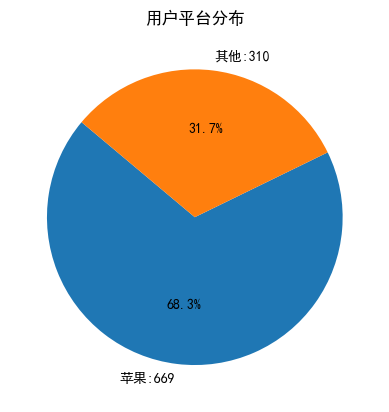

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# 得到数据中的苹果
iphone_count=(df['source'].str.contains('iPhone')).sum()
# 其他数据的数量
other_count=len(df)-iphone_count
# 绘制饼图
labels = ['苹果:'+str(iphone_count), '其他:'+str(other_count)]
sizes = [iphone_count, other_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
# 设置图表标题
plt.title('用户平台分布')
# 显示饼图
plt.show()

In [13]:
import pandas as pd

# 假设数据存储在一个名为df的DataFrame中，列名为created_time
# 如果数据没有存储在DataFrame中，您需要先将数据转换成DataFrame
df['created_time_converted'] = pd.to_datetime(df['created_time'], format='%a %b %d %H:%M:%S %z %Y')
df

,Id,weibo_id,crawler_time,created_time,content,textLength,isLongText,source,user_id,user_screen_name,...,pic_types,weibo_position,url_scheme,place,category,category_id,total_id,city,city_id,created_time_converted
0,1,5045095661306550,2024-06-15 15:30:16.591545,Fri Jun 14 09:20:02 +0800 2024,这么多年，让我坚持坐东航最大的动力应该就是『东航那碗面』了吃瓜上海的素鸡葱油拌面，武汉的热干...,158,False,NaN,1553186924,阿泰的深夜评测,...,0,0,https://m.weibo.cn/status/5045095661306550?mbl...,0,0,0,0,0,0,2024-06-14 09:20:02+08:00
1,2,5042948272294568,2024-06-15 15:30:16.597513,Sat Jun 08 11:07:04 +0800 2024,家人们又闪现了嗷上海·虹桥机场号航站楼(出发),36,False,小米11,6040435363,马唐吉糖糖,...,0,0,https://m.weibo.cn/status/5042948272294568?mbl...,0,0,0,0,0,0,2024-06-08 11:07:04+08:00
2,3,5040621829492460,2024-06-15 15:30:16.605487,Sun Jun 02 01:02:37 +0800 2024,气死我了必须发一下上海·虹桥机场号航站楼(出发),39,False,iPhone客户端,7319494122,羞音,...,0,0,https://m.weibo.cn/status/5040621829492460?mbl...,0,0,0,0,0,0,2024-06-02 01:02:37+08:00
3,4,5037565537944073,2024-06-15 15:30:16.637379,Fri May 24 14:38:00 +0800 2024,好可爱！虹桥机场惊现鼠鼠🐭专用登机口！！上海·虹桥机场号航站楼(出发),78,False,微博网页版,7861773027,小圈在上海,...,0,0,https://m.weibo.cn/status/5037565537944073?mbl...,0,0,0,0,0,0,2024-05-24 14:38:00+08:00
4,5,5037563993656513,2024-06-15 15:30:16.646349,Fri May 24 14:31:52 +0800 2024,去一家汉堡店好奇选择了低碳汉堡结果就是菜包肉没有面包🍞哈哈哆啦梦吃惊上海·虹桥机场号航站楼(出发),95,False,Android,6501061506,检察官777,...,0,0,https://m.weibo.cn/status/5037563993656513?mbl...,0,0,0,0,0,0,2024-05-24 14:31:52+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,975,4425050482653165,2024-06-15 15:44:40.761837,Tue Oct 08 09:21:51 +0800 2019,海浪永远会来，而且在某种程度上，我并不真的希望它们停止但我慢慢知道，我会挺过去的别的潮水还会...,207,False,HUAWEI P30 Pro,1938996037,Pelayo,...,0,0,https://m.weibo.cn/status/4425050482653165?mbl...,0,0,0,0,0,0,2019-10-08 09:21:51+08:00
975,976,4620573130887268,2024-06-15 15:44:40.795721,Tue Mar 30 22:19:03 +0800 2021,渐渐忙碌偶尔惊鸿一瞥瞬间都是安慰第一季度最后一天一下…上海·虹桥机场号航站楼(出发),82,False,iPhone客户端,1771053990,爱吃香肠焗饭的七月,...,0,0,https://m.weibo.cn/status/4620573130887268?mbl...,0,0,0,0,0,0,2021-03-30 22:19:03+08:00
976,977,4480505359779197,2024-06-15 15:44:40.829605,Mon Mar 09 09:59:44 +0800 2020,我在低头美滋滋在看周一的哈哈哈哈哈哈哈推文，突然觉得地铁开得像飞起来一样，没错，现在来到了航...,182,False,HUAWEI P20 Pro,6451618583,Yinjoy0724,...,0,0,https://m.weibo.cn/status/4480505359779197?mbl...,0,0,0,0,0,0,2020-03-09 09:59:44+08:00
977,978,4405971369264887,2024-06-15 15:44:40.863494,Fri Aug 16 17:48:16 +0800 2019,航班晚点，开启机场内散步模式再次走到登机口的时候发现一个肥仔在不断质问地勤小哥哥，飞机到了为...,310,True,微博轻享版,1858243794,LionHeart_阿七,...,0,0,https://m.weibo.cn/status/4405971369264887?mbl...,0,0,0,0,0,0,2019-08-16 17:48:16+08:00


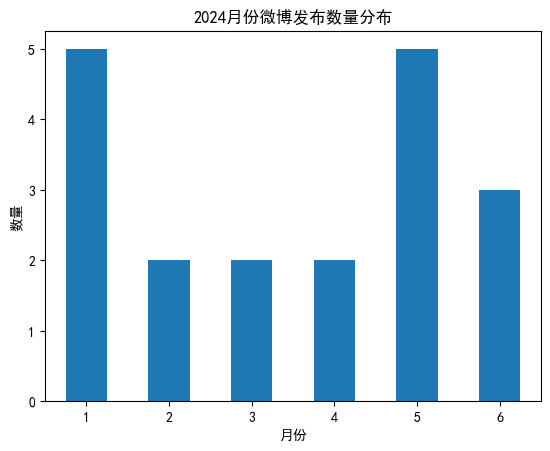

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签

# 假设数据存储在一个名为df的DataFrame中，列名为created_time
# 如果数据没有存储在DataFrame中，您需要先将数据转换成DataFrame，并将时间列转换成datetime格式
df['created_time_converted'] = pd.to_datetime(df['created_time'], format='%a %b %d %H:%M:%S %z %Y')

# 选择2024年的数据
mask_2024 = (df['created_time_converted'].dt.year == 2024)
df_2024 = df[mask_2024]

# 对2024年的月份进行统计
monthly_count_2024 = df_2024['created_time_converted'].dt.month.value_counts().sort_index()

# 绘制柱状图
monthly_count_2024.plot(kind='bar')
plt.xlabel('月份')
plt.xticks(rotation=0)
plt.ylabel('数量')
plt.title('2024月份微博发布数量分布')
plt.show()


In [ ]:
import geopandas as gpd

shanghai = 'https://geojson.cn/api/data/310000.json'
gdf = gpd.read_file(shanghai)

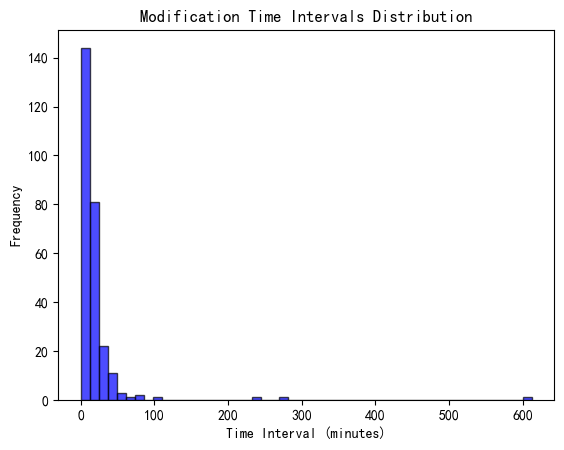

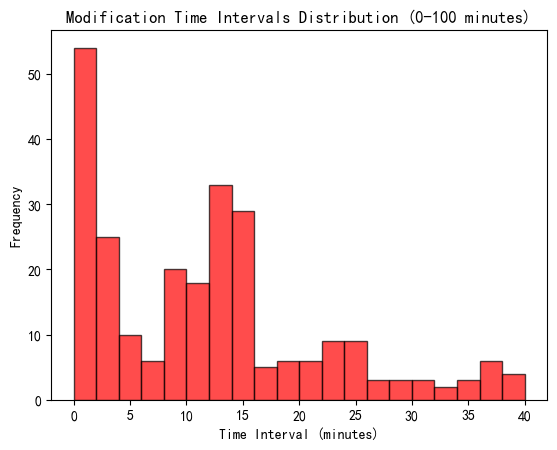

In [3]:
import os
import matplotlib.pyplot as plt
from datetime import datetime

# 文件夹路径
folder_path = 'sqlite'
# 获取文件夹下所有的sqlite文件
sqlite_files = [file for file in os.listdir(folder_path) if file.endswith('.sqlite')]

# 获取每个文件的修改时间并按时间排序
file_modification_times = []
for file in sqlite_files:
    file_path = os.path.join(folder_path, file)
    modification_time = os.path.getmtime(file_path)
    file_modification_times.append((file, modification_time))

# 按照修改时间排序文件
file_modification_times.sort(key=lambda x: x[1])

# 计算相邻文件的时间间隔并转换为分钟
modification_intervals_minutes = []
for i in range(len(file_modification_times) - 1):
    interval = int((file_modification_times[i+1][1] - file_modification_times[i][1]) / 60)  # 转换为分钟
    modification_intervals_minutes.append(interval)
    

# 绘制频率分布曲线图
plt.hist(modification_intervals_minutes, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Modification Time Intervals Distribution')
plt.xlabel('Time Interval (minutes)')
plt.ylabel('Frequency')
plt.show()

# 过滤出0到100分钟的时间间隔数据
filtered_intervals = [interval for interval in modification_intervals_minutes if 0 <= interval <= 40]

# 绘制频率分布曲线图
plt.hist(filtered_intervals, bins=20, alpha=0.7, color='red', edgecolor='black')
plt.title('Modification Time Intervals Distribution (0-100 minutes)')
plt.xlabel('Time Interval (minutes)')
plt.ylabel('Frequency')
plt.show()



<Axes: xlabel='时间'>

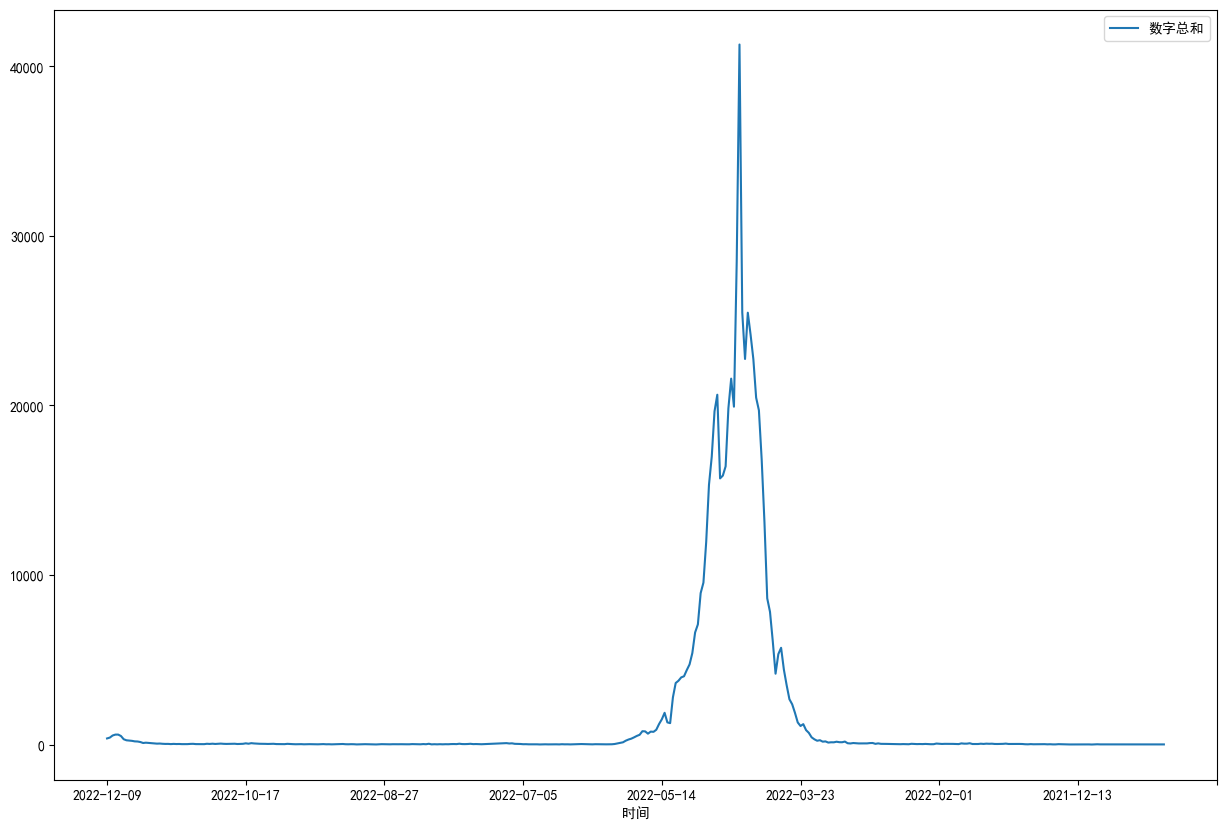

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']= ['SimHei']  # 用来正常显示中文标签

# 假设你的Excel文件为data.xlsx，并且在第一个sheet中
df = pd.read_excel('D:\Code\Python\PaChong\Crawlpreprocess\疫情通报_上海市卫生健康委员会.xlsx')

# 保留字段1中有 年、月、日的行
filtered_df = df[df['字段1'].str.contains('年|月|日')]

# 保留字段1中 含有 例 这个字的行
filtered_df = filtered_df[filtered_df['字段1'].str.contains('例')]

# 保留字段1中 以上海 为最开始的字符串的行
filtered_df = filtered_df[filtered_df['字段1'].str.startswith('上海')]

# 不含 年 月 日的行 删掉
filtered_df = filtered_df[filtered_df['字段1'].str.contains('年|月|日')]

# 对“字段1”列以空格为分隔符进行分割
split_columns = filtered_df['字段1'].str.split(' ', expand=True)

# 将分割后的列与原DataFrame的其他部分合并
result_df = pd.concat([filtered_df.drop(columns=['字段1']), split_columns], axis=1)

# 保存处理后的数据到新的Excel文件
result_df.to_csv('processed_data.csv', index=False, encoding='utf-8-sig')


# 提取第四列及后面所有列当中的每个数字，将数字相加后添加到新的列
# 这里假设我们提取的是第四列及之后的所有列
sum_column_name = '数字总和'  # 新列的名称
result_df[sum_column_name] = result_df.iloc[:, 3:].apply(lambda x: x.astype(str).str.extract('(\d+)').sum(axis=1).astype(float).sum(), axis=1)

# 展示处理后的DataFrame
result_df

# 按照时间序列画出确诊人数图
result_df.plot(x='时间', y='数字总和', figsize=(15, 10))
